# Udacity DAND Data Visualisation Project

# Prosper Loan Dataset

## by Maria Latysheva

## Preliminary Wrangling

In this project I will analyse a dataset of Prosper loans. Prosper is a peer-to-peer lending platform. Borrowers can find competitive rates for personal loans. Loans are funded by investors, not Prosper itself. The dataset contains 81 parameters and includes, after cleaning, around 77 thousand entries.

In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

I will load the dataset from a provided .csv file and visually briefly explore it.

In [2]:
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.sample(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113373,F3A7351261095369275A140,501799,2011-04-11 16:11:10.757000000,NaN,36,Completed,2012-04-24 00:00:00,0.22872,0.1949,0.1849,...,-61.49,0.0,0.0,0.0,0.0,1.0,0,0,0.0,74
24904,C4B0359955365852128D0C6,1108372,2014-01-14 09:18:31.570000000,NaN,60,Current,NaN,0.20808,0.1840,0.1740,...,-3.40,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
32662,C9ED35930677766924921EF,959786,2013-10-17 12:10:39.103000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-32.67,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### Structure of the loan dataset

The table below shows the columns of the dataset and their descriptions. There are 81 columns in total.

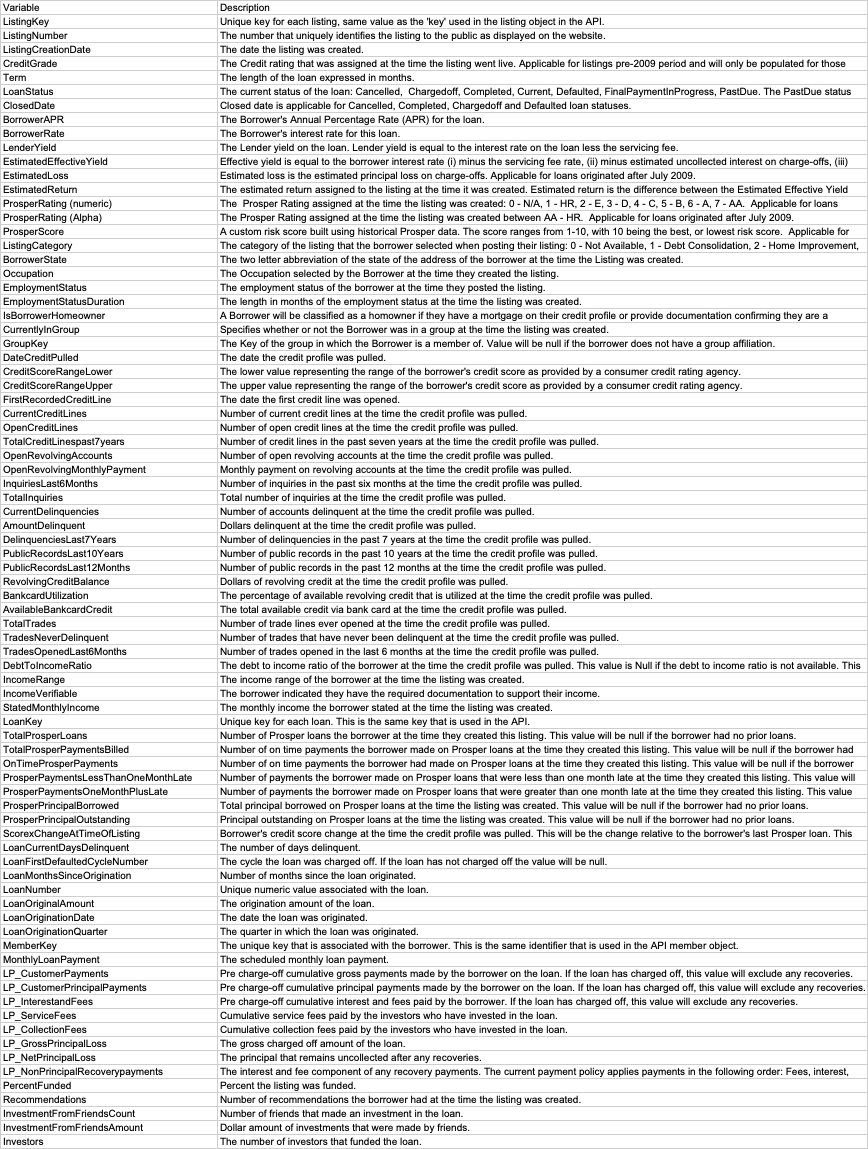

### Cleaning the dataset 

I will only keep the columns that are likely to be used in the subsequent analysis.

In [4]:
col_list = ['Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 
            'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeLower',
            'CreditScoreRangeUpper', 'DebtToIncomeRatio', 'IncomeRange', 'LoanMonthsSinceOrigination', 
            'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment']

To clean the dataset, I will create a copy of the initial dataset and perform all the manipulations with the copy.

In [5]:
loan_df_clean = loan_df.copy()
loan_df_clean = loan_df_clean[col_list]
loan_df_clean.sample(5)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
102897,36,Completed,0.2700,HR,4.0,1,Full-time,136.0,True,680.0,699.0,0.30,"$50,000-74,999",39,1000,2010-12-17 00:00:00,39.02
59719,36,Completed,0.2600,NaN,NaN,0,Full-time,2.0,True,660.0,679.0,0.41,"$75,000-99,999",81,25000,2007-06-12 00:00:00,992.15
72272,60,Current,0.2379,D,4.0,8,Employed,61.0,False,660.0,679.0,0.19,"$50,000-74,999",4,15000,2013-11-01 00:00:00,429.69
104591,60,Defaulted,0.3097,E,1.0,3,Self-employed,10.0,True,680.0,699.0,NaN,"$25,000-49,999",15,4000,2012-12-26 00:00:00,131.81
31089,36,Completed,0.2148,C,7.0,1,Employed,86.0,True,660.0,679.0,0.24,"$50,000-74,999",21,5500,2012-06-27 00:00:00,208.57


In [88]:
print(loan_df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77542 entries, 1 to 113936
Data columns (total 17 columns):
Term                          77542 non-null int64
LoanStatus                    77542 non-null category
BorrowerRate                  77542 non-null float64
ProsperRating (Alpha)         77542 non-null category
ProsperScore                  77542 non-null category
ListingCategory (numeric)     77542 non-null category
EmploymentStatus              77542 non-null object
EmploymentStatusDuration      77542 non-null float64
IsBorrowerHomeowner           77542 non-null bool
CreditScoreRangeLower         77542 non-null float64
CreditScoreRangeUpper         77542 non-null float64
DebtToIncomeRatio             77542 non-null float64
IncomeRange                   77542 non-null category
LoanMonthsSinceOrigination    77542 non-null int64
LoanOriginalAmount            77542 non-null int64
MonthlyLoanPayment            77542 non-null float64
LoanOriginationYear           77542 non-null ob

There are 114K entries, some of them include NaN entries. I will delete all the entries that have missing values.

In [7]:
loan_df_clean = loan_df_clean.dropna()

In [8]:
# change Loan Origination Date to Loan Origination Year leaving only the year in which the loan was originated
# drop Loan Origination Date afterwards
loan_df_clean['LoanOriginationYear'] = loan_df_clean['LoanOriginationDate'].apply(lambda x: x.split('-')[0])
loan_df_clean = loan_df_clean.drop('LoanOriginationDate', axis = 1)

In [9]:
loan_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 17 columns):
Term                          77543 non-null int64
LoanStatus                    77543 non-null object
BorrowerRate                  77543 non-null float64
ProsperRating (Alpha)         77543 non-null object
ProsperScore                  77543 non-null float64
ListingCategory (numeric)     77543 non-null int64
EmploymentStatus              77543 non-null object
EmploymentStatusDuration      77543 non-null float64
IsBorrowerHomeowner           77543 non-null bool
CreditScoreRangeLower         77543 non-null float64
CreditScoreRangeUpper         77543 non-null float64
DebtToIncomeRatio             77543 non-null float64
IncomeRange                   77543 non-null object
LoanMonthsSinceOrigination    77543 non-null int64
LoanOriginalAmount            77543 non-null int64
MonthlyLoanPayment            77543 non-null float64
LoanOriginationYear           77543 non-null object
dtype

### Main features of interest in the dataset

In my analysis I will investigate into the following features and potential interactions between them: 

- How is the Borrower Rate distributed and how is it affected by Loan Amount, Debt-to-Income Ratio, borrower's Prosper Rating?

- What is the specifics of the Prosper loans in terms of the Loan Amount, Loan Status and Debt-to-Income Ratio? 

- How do the loans with the Loan Status of `Defaulted` stand out?


### The following features will help support my investigation into my features of interest:

I will examine the potential effects of the following variables:
- Loan Status 
- Prosper Score 
- Employment Status 
- Income Range 
- Debt-to-Income Ratio and 
- Loan Original Amount 

on the Borrower's Interest Rate and the Loan Outcome Status.

## Univariate Exploration

In this section, I will investigate two sets of variables: 

1) Loan-related variables:
- Borrower Rate 
- Original Loan Amount and 
- Loan Outcome Status

2) Borrower-related variables:
- Prosper Score 
- Employment Status 
- Debt-to-Income Ratio and 
- Income Range 

### 1) Analysing Loan-Related variables
 
How are the Borrower Rate, Loan Outcome Status and Original Loan Amount disbributed? 

Are there any peculiarities in the disbributions?

#### Borrower Rate

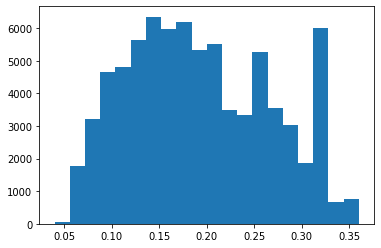

In [10]:
# plot a histogram showing the distribution of the Borrower Rate
plt.hist(data = loan_df_clean, x = 'BorrowerRate', bins = 20);

I expected to see a distribution close to normal. Instead I see a bimodal distribution with two peaks at around 0.26 (with over 5K entries) and 0.32 (with around 6K entries). I will plot more detailed histograms for these ranges to try to find abnormalities or outliers.

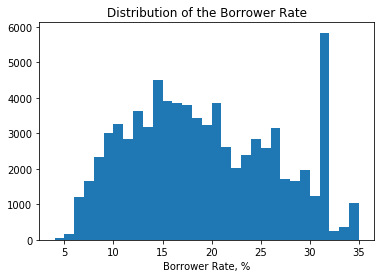

In [11]:
# plot a histogram with smaller bins to take a closer look at the abnormalities
bin_values = np.arange(0.04, 0.36, 0.01)
tick_props = np.arange(0.0, 0.36, 0.05)
tick_names = ['{:0.0f}'.format(v*100) for v in tick_props]
plt.xticks(tick_props, tick_names)
plt.hist(data = loan_df_clean, x = 'BorrowerRate', bins = bin_values);
plt.xlabel('Borrower Rate, %')
plt.title('Distribution of the Borrower Rate');


In [591]:
loan_df_clean['BorrowerRate'].describe()

count    77543.000000
mean         0.193408
std          0.073898
min          0.040000
25%          0.134900
50%          0.184500
75%          0.252400
max          0.360000
Name: BorrowerRate, dtype: float64

In [12]:
## select entries with the borrower rate of around 0.32
rate_32 = (loan_df_clean['BorrowerRate'] >= 0.31)
loan_df_32 = loan_df_clean.loc[rate_32,:]
loan_df_32.sample(5)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LoanOriginationYear
57134,36,Current,0.3177,HR,4.0,6,Other,148.0,False,680.0,699.0,0.05,"$1-24,999",15,2000,86.85,2012
109905,36,Completed,0.3600,HR,2.0,1,Full-time,32.0,False,600.0,619.0,0.49,"$25,000-49,999",46,4000,183.22,2010
45942,36,Current,0.3177,HR,3.0,16,Employed,24.0,False,700.0,719.0,0.24,"$50,000-74,999",21,4000,173.71,2012
94861,36,Chargedoff,0.3450,HR,1.0,2,Part-time,115.0,False,600.0,619.0,0.43,"$25,000-49,999",40,3500,157.34,2010
31711,36,Completed,0.3199,E,4.0,7,Employed,235.0,True,660.0,679.0,0.18,"$50,000-74,999",31,5000,217.74,2011


In [13]:
# select entires with the borrower rate of 0.3177 which seems to be the most often rate in this range
rate_3177 = (loan_df_clean['BorrowerRate'] == 0.3177)
loan_df_3177 = loan_df_clean.loc[rate_3177,:]
loan_df_3177.sample(5)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LoanOriginationYear
113625,36,Defaulted,0.3177,HR,4.0,13,Other,95.0,True,800.0,819.0,0.81,"$1-24,999",24,4000,173.71,2012
11258,36,Current,0.3177,HR,5.0,13,Employed,174.0,True,660.0,679.0,0.40,"$25,000-49,999",25,3000,130.28,2012
1066,36,Current,0.3177,HR,5.0,2,Other,27.0,True,700.0,719.0,0.12,"$1-24,999",23,4000,173.71,2012
80808,36,Completed,0.3177,HR,3.0,1,Other,32.0,True,680.0,699.0,0.23,"$100,000+",18,4000,173.71,2012
65511,36,Chargedoff,0.3177,HR,5.0,3,Employed,16.0,False,680.0,699.0,0.24,"$1-24,999",18,2200,95.54,2012


Based on the visual exploration of the above sample, I noticed that all the Borrower Rates of 31.77% were attributed to 2012. I will take a closer look at the distribution of the loans with these Borrower Rates by Loan Origination Year.

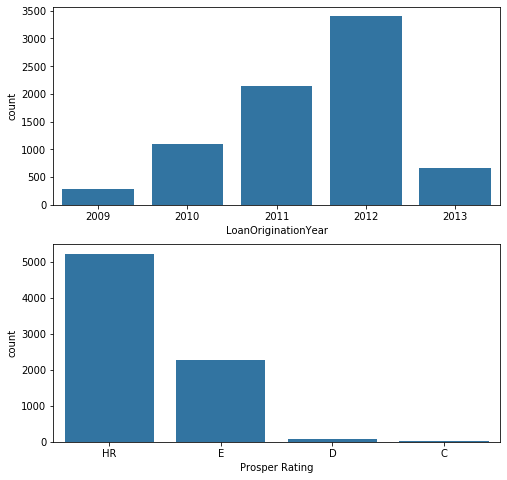

In [25]:
# check the distribution of the high borrower rate by year
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]

sb.countplot(data = loan_df_32, x = 'LoanOriginationYear', color = default_color, ax = ax[0]);
plt.xlabel('Loan Originaltion Year');

sb.countplot(data = loan_df_32, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1]);
plt.xlabel('Prosper Rating');

The above distributions show that the peak in the Borrower Rate of around 32% was mainly in 2011 and 2012 and was attributable mainly to the borrowers with the lowest Prosper Rating of HR.

#### Loan Status

In this section I will explore the distribution of the categorical variable of Loan Status.

In [595]:
loan_df_clean['LoanStatus'].unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [26]:
# replace all Past Due statuses with the single 'Past Due' status 
loan_df_clean['LoanStatus'].replace(('Past Due (.*)'), 'Past Due', regex = True, inplace = True)

In [597]:
loan_df_clean['LoanStatus'].unique()

array(['Current', 'Past Due', 'Defaulted', 'Completed', 'Chargedoff',
       'FinalPaymentInProgress'], dtype=object)

In [27]:
# define a function to convert a variable into an ordered categorical type

def type_to_ordered(dictionary):
    for var in dictionary:
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = dictionary[var])
        loan_df_clean[var] = loan_df_clean[var].astype(ordered_var)

In [28]:
# convert ProsperRating (Alpha), LoanStatus, and clarity into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Defaulted','Past Due','Chargedoff','Current',
                                   'FinalPaymentInProgress', 'Completed']}

In [29]:
type_to_ordered(ordinal_var_dict)

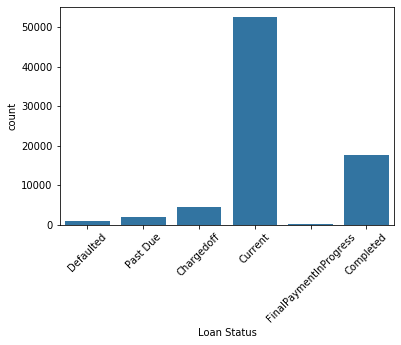

In [37]:
# plot the bar chart of the loan statuses
sb.countplot(data = loan_df_clean, x = 'LoanStatus', color = default_color);
plt.xlabel('Loan Status');
plt.xticks(rotation = 45);


As we can see from the above bar plot, the overwelming majority of loans have the status of `Current` or `Completed`. The amount of `Defaulted` and `Past Due` loans is relatively minor.

#### Original Loan Amount
In this section I will explore the distribution of the Original Loan Amount. Since it is a numeric variable, I will use the `hist` function to plot a histogram.

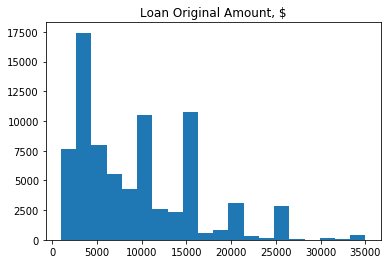

In [39]:
# plot a histogram showing the distribution of the Original Loan Amount
plt.hist(data = loan_df_clean, x = 'LoanOriginalAmount', bins = 20);
plt.title('Loan Original Amount, $');

From the above distribution we can see peaks at the even amounts: 10K, 15K, 20K and 25K, which is intuitively logical.
I will take a closer look at the distribution of loans with smaller amounts up to 10K.

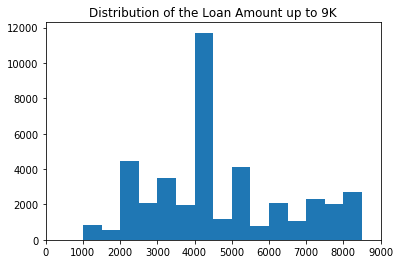

In [40]:
# plot a distribution of the subset of loans with Loan Amount below 9K
bins = np.arange(0, 9000, 500)
plt.hist(data = loan_df_clean, x = 'LoanOriginalAmount', bins = bins);
plt.xlim(0, 9000);
plt.title('Distribution of the Loan Amount up to 9K');

##### Loans with the Loan Amount of 4K
From the above plot I see a strange peak of loans with the Loan Amount of 4K. I need to look at this feature deeper.

In [41]:
amount_4000 = (loan_df_clean.LoanOriginalAmount >= 3800) & (loan_df_clean.LoanOriginalAmount <= 4200)
loan_df_4K = loan_df_clean.loc[amount_4000,:]
loan_df_4K.sample(5)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LoanOriginationYear
37315,36,Current,0.2958,E,6.0,3,Employed,85.0,True,660.0,679.0,0.27,"$50,000-74,999",20,4000,168.89,2012
58685,36,Completed,0.3177,HR,5.0,7,Other,75.0,True,700.0,719.0,0.07,"$25,000-49,999",19,3922,170.30,2012
62355,36,Chargedoff,0.3177,HR,3.0,7,Employed,305.0,False,680.0,699.0,0.12,"$75,000-99,999",17,4000,173.71,2012
53105,36,Current,0.3177,HR,4.0,18,Employed,171.0,True,660.0,679.0,0.23,"$50,000-74,999",16,4000,173.71,2012
56720,36,Current,0.1870,C,4.0,1,Employed,29.0,False,700.0,719.0,0.51,"$25,000-49,999",5,4000,146.02,2013


I see that all these loans have the amount of 4K, which I find strange. I would expect 5K to be the most oftenly provided amount.

##### May Listing Category account for the strange peak of 4K in the Loan Amount?

Let's see the distribution of this subset by Listing Category.
There are the following listing categories that the borrower selected when posting their listing: 

0 - Not Available, 
1 - Debt Consolidation, 
2 - Home Improvement, 
3 - Business, 
4 - Personal Loan, 
5 - Student Use, 
6 - Auto, 
7- Other, 
8 - Baby&Adoption, 
9 - Boat, 
10 - Cosmetic Procedure, 
11 - Engagement Ring, 
12 - Green Loans, 
13 - Household Expenses, 
14 - Large Purchases, 
15 - Medical/Dental, 
16 - Motorcycle, 
17 - RV, 
18 - Taxes, 
19 - Vacation, 
20 - Wedding Loans

In [42]:
listing_dict = {'ListingCategory (numeric)': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
type_to_ordered(listing_dict)

I will plot below distributions of the loans by Listing Category for the entire dataset and for the subset that includes only 4K loans to check if these 4K loans were attributable to a particular listing category.

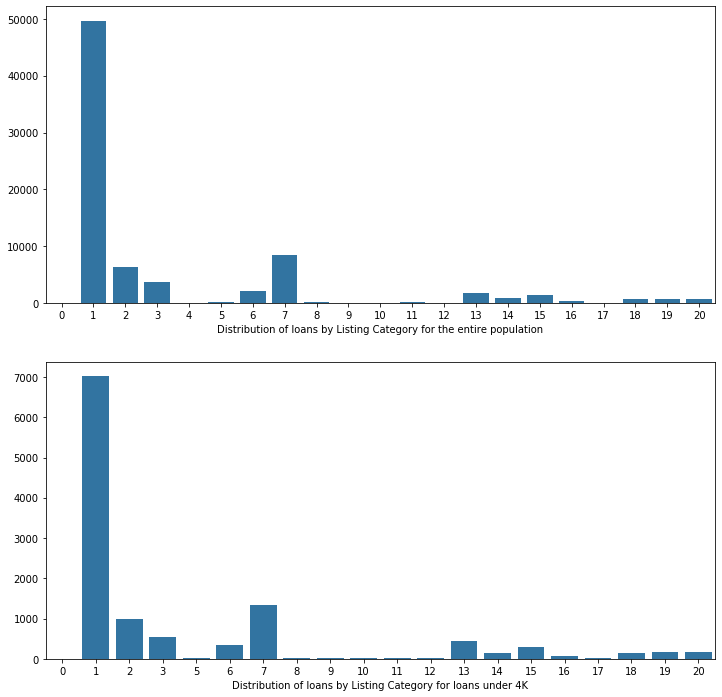

In [55]:
# plot the bar chart of the Prosper Score for the full database and for the database of 4K loans

plt.figure(figsize = [12, 12])
plt.subplot(2, 1, 1)
sb.countplot(data = loan_df_clean, x = 'ListingCategory (numeric)', color = default_color);
plt.xlabel('Distribution of loans by Listing Category for the entire population')
plt.ylabel('')

# right plot: distribution of Prosper Score
plt.subplot(2, 1, 2)
sb.countplot(data = loan_df_4K, x = 'ListingCategory (numeric)', color = default_color);
plt.xlabel('Distribution of loans by Listing Category for loans under 4K')
plt.ylabel('');

We can see from the above plots that the overwelming majority of either the entire population or the 4K loans only were provided for Listing Category 1, which is Debt Consolidation.
No particular pattern in the Listing Category is observed here that could explain the strange Loan Amount of 4K.

##### May the Income Range account for the peak at 4K in the Loan Amount?

I will now look into the distribution of Income Range to see if the Income Range can account for the 4K peak.

In [612]:
loan_df_clean.IncomeRange.unique()

[$50,000-74,999, $25,000-49,999, $100,000+, $75,000-99,999, $1-24,999]
Categories (5, object): [$1-24,999 < $25,000-49,999 < $50,000-74,999 < $75,000-99,999 < $100,000+]

In [56]:
# identify entries with the Income Range being 'Not employed'
ind = loan_df_clean[(loan_df_clean.IncomeRange == 'Not employed')].index
ind

Int64Index([21386], dtype='int64')

In [57]:
# drop the only entry with the Income Range being Not employed
loan_df_clean = loan_df_clean.drop(ind)

In [615]:
loan_df_clean.IncomeRange.unique()

[$50,000-74,999, $25,000-49,999, $100,000+, $75,000-99,999, $1-24,999]
Categories (5, object): [$1-24,999 < $25,000-49,999 < $50,000-74,999 < $75,000-99,999 < $100,000+]

In [58]:
# convert the Income Range into ordered type, with 'Not employed' being the lowest and $100,000+ being the heighest
incomeRange_dict = {'IncomeRange': ['$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                '$75,000-99,999', '$100,000+']}
type_to_ordered(incomeRange_dict)

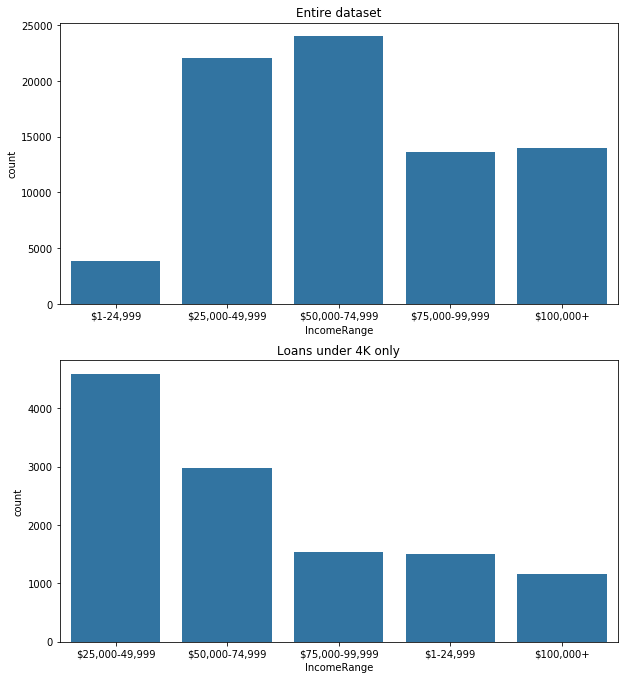

In [59]:
# plot the bar chart of the Income Range for the full database and for the database of 4K loans

fig, ax = plt.subplots(nrows=2, figsize = [10,8])

default_color = sb.color_palette()[0]
sb.countplot(data = loan_df_clean, x = 'IncomeRange', color = default_color, ax = ax[0]).set_title('Entire dataset')

sb.countplot(data = loan_df_4K, x = 'IncomeRange', color = default_color, ax = ax[1]).set_title('Loans under 4K only')
plt.subplots_adjust(top = 1.2)
plt.show();

I would expect that the majority of the 4K loans would be provided to low income people. Instead I see that these small loans were mostly provided to 25K - 50K income earners. 

So no particular pattern is identified in the Income Range distribution that could account for the strange peak of 4K in the Loan Amount.

### 2) Analysing Borrower-related variables

How are the Prosper Rating, Prosper Score, Debt-to-Income Ratio and Income Range distributed? 

May any peculiarities be identified in the disbributions?

#### Prosper Rating (Alpha) and Prosper Score

In this section I want to take a closer look at the distributions of the ratings and scores, including Prosper Rating, Prosper Score and Credit Score.

In [506]:
loan_df_clean['ProsperRating (Alpha)'].unique()

array(['A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [507]:
loan_df_clean['ProsperScore'].unique()

array([ 7.,  9.,  4., 10.,  2., 11.,  8.,  5.,  3.,  6.,  1.])

In [60]:
loan_df_clean['ProsperScore'] = loan_df_clean['ProsperScore'].astype(int)
loan_df_clean['ProsperScore'].unique()

array([ 7,  9,  4, 10,  2, 11,  8,  5,  3,  6,  1])

In [509]:
loan_df_clean.CreditScoreRangeUpper.unique()

array([699., 819., 759., 719., 839., 659., 679., 739., 779., 799., 619.,
       639., 859., 879., 899.])

The Credit Score variable has too many categories. I will not include the Credit Score provided by external rating agencies into my analysis in order not to overcomplicate it.

In [61]:
# convert the Prosper Rating into ordered type, with AA being the highest and HR being the lowest
prosper_dict = {'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
               'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
type_to_ordered(prosper_dict)

In [92]:
loan_df_clean['ProsperRating (Alpha)'].dtype

CategoricalDtype(categories=['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered=True)

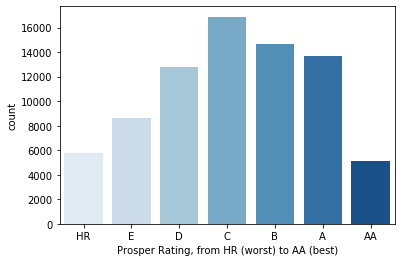

In [69]:
# plot the bar chart of the Prosper Rating
sb.countplot(data = loan_df_clean, x = 'ProsperRating (Alpha)', palette = 'Blues');
plt.xlabel('Prosper Rating, from HR (worst) to AA (best)');

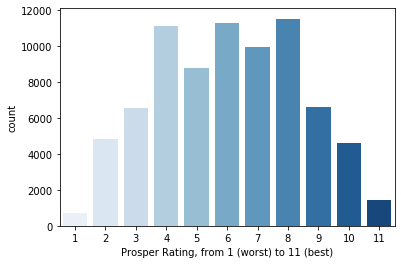

In [70]:
# plot the bar chart of the Prosper Score
sb.countplot(data = loan_df_clean, x = 'ProsperScore', palette = 'Blues');
plt.xlabel('Prosper Rating, from 1 (worst) to 11 (best)');

I can see from the above plot that the majority of the loans had the average Prosper Rating of C (middle). 

And the majority of the distribution of Prosper Scores lie in the middle part, being from 4 to 8.

#### Employment Status and Employment Status Duration

In this section I want to take a closer look at the distribution of Employment Status to see which borrowers were the most popular with lenders.

In [514]:
loan_df_clean.EmploymentStatus.unique()

array(['Employed', 'Other', 'Full-time', 'Part-time', 'Retired',
       'Self-employed', 'Not employed'], dtype=object)

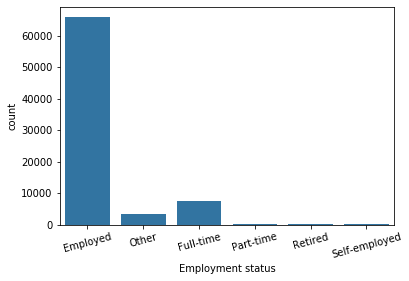

In [67]:
# plot the bar chart of the Employment Status
sb.countplot(data = loan_df_clean, x = 'EmploymentStatus', color = default_color)
plt.xticks(rotation = 15);
plt.xlabel('Employment status');

As we see from the plot, this variable is not very representative for our analysis. I will instead look into the `Employment Status Duration` variable to check for any insights.

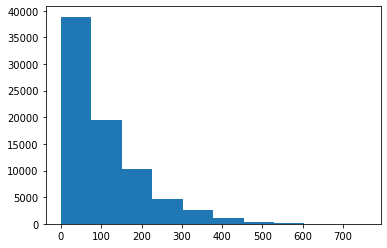

In [516]:
# plot the histogram of the Employment Status Duration
plt.hist(data = loan_df_clean, x = 'EmploymentStatusDuration');

From the plot above we can see that the majority of the borrowers were employed from 0 to 150 months. Let's plot a more detailed histogram for this duration.

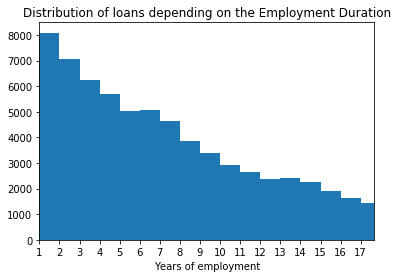

In [626]:
# plot the histogram of the Employment Status Duration
bins = np.arange(0, 600, 12)
plt.hist(data = loan_df_clean, x = 'EmploymentStatusDuration', bins = bins);
tick_locs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
plt.xticks(bins, tick_locs)
plt.xlim(0,200)
plt.xlabel('Years of employment')
plt.title('Distribution of loans depending on the Employment Duration');

It may seem counter-intuitive, but there is a linear trend in the employment duration at the beginning of the distribution and the borrowers with fewest years of employment were the most frequent in the Prosper dataset.

#### Income Range and Debt-to-Income Ratio

In this section I will take a closer look at the distributions of the Income Range and the Debt-to-Income Ratio.

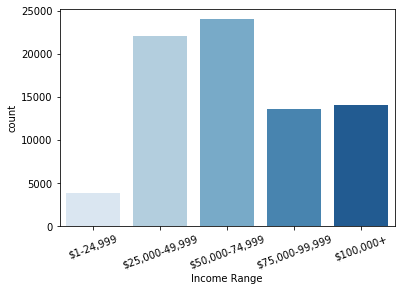

In [71]:
# plot the bar chart of the Income Range
sb.countplot(data = loan_df_clean, x = 'IncomeRange', palette = 'Blues');
plt.xticks(rotation = 20);
plt.xlabel('Income Range');

It may be seen from the above plot that the majority of the borrowers were earning income in the range from 25K to 75K, which is to be expected. No loans have been provided to borrowers with the income range of `Not employed`.

In [524]:
loan_df_clean.DebtToIncomeRatio.describe()

count    77542.000000
mean         0.258738
std          0.318349
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

##### Debt-to-Income Ratio and the specifics of overcredited borrowers 
The maximum Debt-to-Income Ratio is 10.01, which is way too high. I need to look into the distribution of DIR more closely.

In [631]:
loan_df_overcredited = loan_df_clean[loan_df_clean.DebtToIncomeRatio > 1]
loan_df_overcredited.shape[0]

323

There are 323 borrowers in our cleaned dataset whose Debt-to-Income Ratio exceeds 1! And they still receive loans!

I am curious at what average borrower rate they obtain such loans?

In [632]:
loan_df_overcredited.BorrowerRate.describe()

count    323.000000
mean       0.275836
std        0.058681
min        0.071000
25%        0.249850
50%        0.307300
75%        0.317700
max        0.350000
Name: BorrowerRate, dtype: float64

This is what to be expected. The average rate the overcredited borrowers obtain loans for is 30%!
I will analyse the correlation between Debt-to-Income Ratio and the Borrower Rate further in the bivariate and multivariate visualisations below.

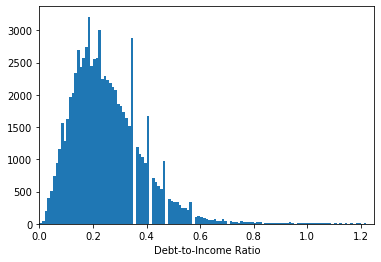

In [73]:
# plot the histogram of the Debt-to-Income Ratio
bins = np.arange(0, 1.3, 0.01)
plt.hist(data = loan_df_clean, x = 'DebtToIncomeRatio', bins = bins);
plt.xlim(0, 1.25);
plt.xlabel('Debt-to-Income Ratio');

The disbribution is skewed to the right with some unusual peaks at 0.2, 0.25, 0.37 and 0.43. I need to investigate this point further.

In [74]:
abnormaldir = (loan_df_clean.DebtToIncomeRatio >= 0.4) & (loan_df_clean.DebtToIncomeRatio <= 0.45)
loan_df_abnormaldir = loan_df_clean.loc[abnormaldir, :]
loan_df_abnormaldir.sample(5)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LoanOriginationYear
53505,36,Current,0.2155,D,4,1,Employed,52.0,False,720.0,739.0,0.43,"$25,000-49,999",5,10000,379.58,2013
111680,36,Current,0.2019,C,6,1,Employed,63.0,False,700.0,719.0,0.41,"$25,000-49,999",16,7000,260.82,2012
48421,36,Current,0.2199,D,4,1,Employed,71.0,True,680.0,699.0,0.42,"$25,000-49,999",12,10000,381.85,2013
33749,36,Chargedoff,0.2500,D,7,1,Full-time,45.0,True,640.0,659.0,0.43,"$50,000-74,999",45,7000,278.32,2010
2362,36,Current,0.1559,B,4,1,Employed,275.0,True,720.0,739.0,0.41,"$25,000-49,999",7,6000,209.73,2013


Based on visual exploration of the above sample of 5 entries, I do not see any factors that would account for these abnormal Debt-to-Income Ratio peaks.

### The unusual points identified and transformations performed

Based on the univariate plots above I identified the following unusual points in the distributions:

#### 1) Loan-related variables:

- **Borrower Rate:** Instead of the expected close to normal distribution, I saw two peaks at around 0.26 (with over 5K entries) and 0.32 (with around 6K entries). A closer look revealed that the 32% rate was mostly offered in 2011 and 2012 for the borroweres with the worst Prosper Rating of `HR`.

- **Loan Status:** The overwelming majority of loans have the status of `Current` or `Completed`. The amount of `Defaulted` and `Past Due` loans is relatively minor. No unusal points have been identified in this variable.

- **Original Loan Amount:** The distribution is highly skewed to the right with the peaks being on even numbers (10K, 15K, 20K, 25K) expect for the peak for 4K loans. The overwelming majority of either the entire population or the 4K loans were provided for `Debt Consolidation` to borrowers earning 25K - 75K.

#### 2) Borrower-related variables:

- **Prosper Scores:** The majority of the loans had the average Prosper Rating of C (middle). And the majority of the distribution of Prosper Scores lie in the middle part, being from 4 to 8. So there was nothing unusual in these distributions.

- **Employment Status Duration:** Most frequently the loans were provided to people who had the fewest months of employment. This is counter to our expectations.

- **Debt-to-Income Ratio:** The disbribution is skewed to the right with some unusual peaks at 0.2, 0.25, 0.37 and 0.43. Based on my preliminary analysis, I did not find the explanations for this.

- **Income Range:** The overwelming majority of loans were provided to borrowers earning from 25K to 75K, which is what one would expect.


### Operations on the data to tidy, adjust and change the form of the data

To make my analysis easier I performed the following operations on the dataset:

- Kept only the 18 columns that could be of interest for my analysis;

- Kept only entries without missing values;

- I extracted the Loan Origination Year from the Loan Origination Date to use in the subsequent analysis;

- Recategorised the nominal variables into `category` type: ProsperRating, ProsperScore, ListingCategory and Income Range;

- Removed the category 'Not employed' from the Income Range to make subsequent visualisations cleaner. There was only one entry of this category;

- Recategorised all the `Past Due (a paricular number of days)` categories in the Loan Status into a single category `Past Due` to make subsequent visualisations simpler and more to the point.

## Bivariate Exploration

In this section, I will investigate relationships between pairs of variables in the Prosper dataset to try answering the following questions:

#### 1) Does the Borrower Rate depend on the Original Loan Amount?

#### 2) How does the Borrower Rate depend on the Credit Score? And on the Prosper Rating?

#### 3) How does the Borrower Rate change for overcredited borrowers with the Debt-to-Income Ratio exceeding 0.4?

I will start the bivariate analysis by plotting the **correlation matrix** to identify any meaningful correlations between the variables of interest.

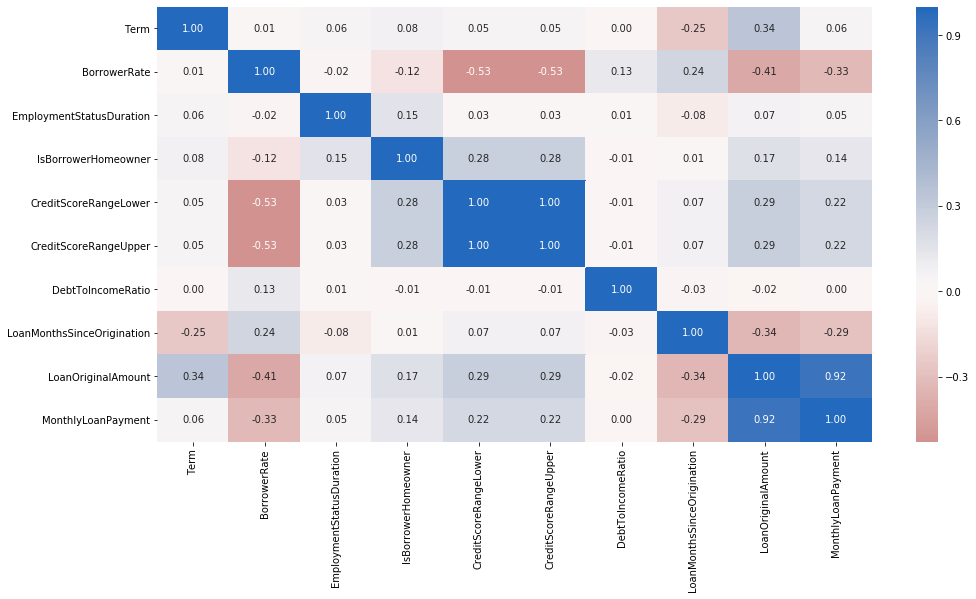

In [388]:
plt.figure(figsize = [16,8])
sb.heatmap(loan_df_clean.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

From the above correlation matrix, I do not see any meaningfull strong correlations between the numeric variables. I would expect the Loan Orignal Amount to affect the Borrower Rate to a considerable extent. However from the above plot I see that the Credit Score has an even greater effect on the Borrower Rate.

On the plots below I will plot visualisations to investigate into the following meaningful correlations:

- Borrower Rate and Loan Original Amount

- Borrower Rate and Credit Score (I will use the Upper Range variable)

- Borrower Rate and Prosper Rating (a categorical variable not shown on the correlation matrix above)

Besides, as I identified in the univariate visualisation section, there is an interesting correlation between ovecredited borrowers with Debt-to-Income ratio of over 1 and their Borrower Rate. Although the general correlation matrix does not show any strong correlation for the entire dataset. So I will also look at:

- Borrower Rate and Debt-to-Income Ratio (for overcredited borrowers)

#### 1) Does the Borrower Rate depend on the Loan Original Amount?

To answer this question I will plot a scatter plot with a regression line and a heat map for a sample of 1000 entries (to avoide overplotting).

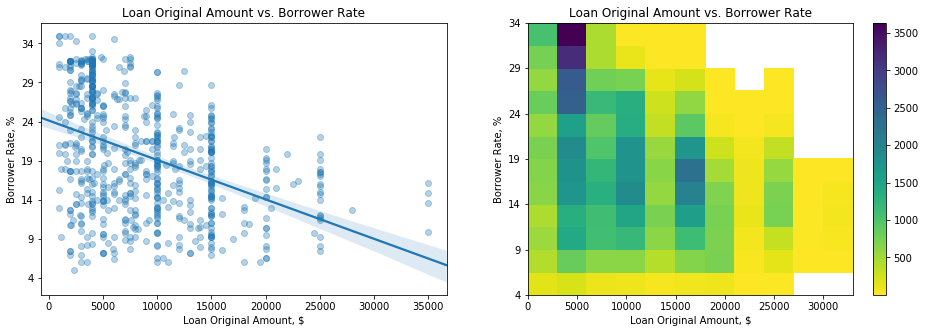

In [75]:
np.random.seed(2018)
sample = np.random.choice(loan_df_clean.shape[0], 1000, replace = False)
loan_df_subset = loan_df_clean.reindex(sample)

plt.figure(figsize = [16, 5])

# plotting the scatterplot with a regression line
plt.subplot(1, 2, 1)
tick_props = np.arange(0.04, 0.36, 0.05)
tick_names = ['{:0.0f}'.format(v*100) for v in tick_props]
plt.yticks(tick_props, tick_names)
sb.regplot(data = loan_df_subset, x = 'LoanOriginalAmount', y = 'BorrowerRate', fit_reg = True,
            scatter_kws = {'alpha' : 1/3})
plt.title('Loan Original Amount vs. Borrower Rate')
plt.xlabel('Loan Original Amount, $')
plt.ylabel('Borrower Rate, %');

# plotting the heat map
plt.subplot(1, 2, 2)
bins_x = np.arange(0, 35000, 3000)
bins_y = np.arange(0.04, 0.36, 0.025)
plt.yticks(tick_props, tick_names)
plt.hist2d(data = loan_df_clean, x = 'LoanOriginalAmount', y = 'BorrowerRate',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.title('Loan Original Amount vs. Borrower Rate')
plt.xlabel('Loan Original Amount, $')
plt.ylabel('Borrower Rate, %');
plt.colorbar();

From the above plot we can see a negative correlation where the Borrower Rate gradually decreases from almost 25% down to 8% as the Loan Amount increases. This is logical as the borrowers borrowing large amounts would unlikely to borrow money if the interest rate is too high.

The heat map shows better than the scatter plot the cluster of loans with high borrower rates above 29% and above 32%. 

This is an issue to dive into deeper in the multivariate analysis. I analyse the dependence of the high Borrower Rate on the Loan Original Amount and the Year in the multivariate visualisation section below.

#### 2) How does the Borrower Rate depend on the Credit Score?

To answer this question I will plot a scatter plot with a regression line.

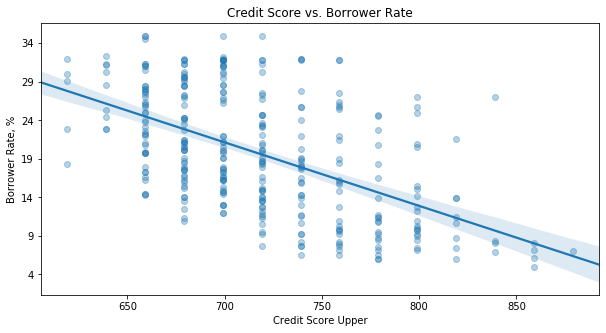

In [391]:
plt.figure(figsize = [10, 5])
tick_props = np.arange(0.04, 0.36, 0.05)
tick_names = ['{:0.0f}'.format(v*100) for v in tick_props]
plt.yticks(tick_props, tick_names)
sb.regplot(data = loan_df_subset, x = 'CreditScoreRangeUpper', y = 'BorrowerRate', fit_reg = True,
            scatter_kws = {'alpha' : 1/3})
plt.title('Credit Score vs. Borrower Rate')
plt.xlabel('Credit Score Upper')
plt.ylabel('Borrower Rate, %');

From the plot above we see that there is a moderate negative correlation between the Borrower Rate and the Credit Score. A higher Credit Score means that the Borrower is more reliable. So this correlation is absolutely logical. The borrowers with a lower Credit Score have to borrow at a higher Borrower Rate.

#### How does the Borrower Rate depend on the categorical variable of Prosper Rating?

Since Prosper Rating is a categorical variable, I will use box plots to investigate into the effects of the Prosper Rating on the Borrower Rate.

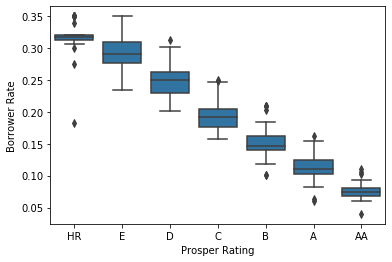

In [76]:
# plot the box plots of for the borrower rates depending on the Prosper Ratings
np.random.seed(2000)
sample_1000 = np.random.choice(loan_df_clean.shape[0], 1000, replace = False)
loan_df_subset1000 = loan_df_clean.reindex(sample_1000)

sb.boxplot(data = loan_df_subset1000, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', color = default_color);
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower Rate');

From the above plot it can be clearly seen that the Prosper Rating has an immediate effect on the Borrower Rate: the higher the Prosper Rating is, the lower the Borrower Rate is.

#### 3) How does the Borrower Rate change for overcredited borrowers with the Debt-to-Income Ratio exceeding 0.4?

I notices that the dataset contains around 300 entries for borrowers whose Debt-to-Income Ratio exceeding 1 and they still obtained loan! I want to take a closer look at the relationship between the Borrower Rate and the Debt-to-Income Ratio for overcredited borrowers with Debt-to-Income Ratio above 0.4.

In [77]:
# select a subset with Debt-to-Income Ratio above 0.4
dir_above_04 = (loan_df_clean.DebtToIncomeRatio > 0.4)
loan_df_dir04 = loan_df_clean.loc[dir_above_04, :]
loan_df_dir04.sample(5)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LoanOriginationYear
40161,36,Current,0.2010,D,5,1,Employed,41.0,False,680.0,699.0,0.55,"$25,000-49,999",2,8578,319.22,2014
2308,60,Current,0.3258,E,6,15,Other,78.0,False,660.0,679.0,0.62,"$1-24,999",17,3000,101.87,2012
25442,36,Completed,0.3400,HR,5,5,Full-time,99.0,True,640.0,659.0,0.48,"$25,000-49,999",52,1100,48.66,2009
42221,36,Current,0.1765,C,7,1,Employed,30.0,False,640.0,659.0,0.46,"$50,000-74,999",1,3000,107.93,2014
32958,60,Completed,0.2624,D,6,1,Employed,43.0,False,720.0,739.0,0.58,"$50,000-74,999",16,15000,451.24,2012


In [393]:
loan_df_dir04.DebtToIncomeRatio.describe()

count    8772.000000
mean        0.613678
std         0.830253
min         0.410000
25%         0.440000
50%         0.480000
75%         0.550000
max        10.010000
Name: DebtToIncomeRatio, dtype: float64

In [394]:
loan_df_dir04.BorrowerRate.describe()

count    8772.000000
mean        0.231244
std         0.064365
min         0.062800
25%         0.184000
50%         0.227200
75%         0.291600
max         0.360000
Name: BorrowerRate, dtype: float64

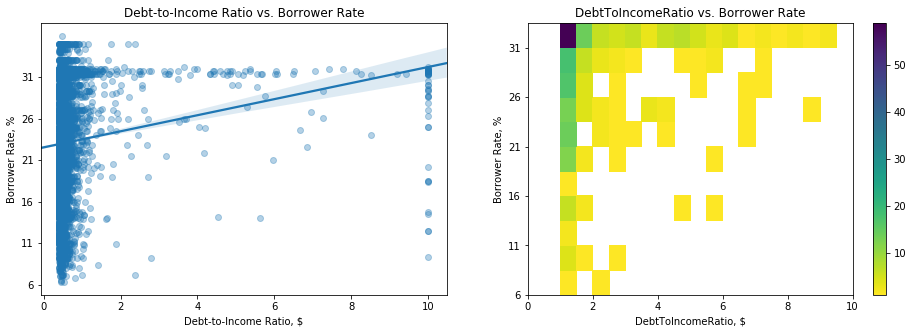

In [395]:
plt.figure(figsize = [16, 5])

# plotting the scatterplot with a regression line
plt.subplot(1, 2, 1)
tick_props = np.arange(0.06, 0.36, 0.05)
tick_names = ['{:0.0f}'.format(v*100) for v in tick_props]
plt.yticks(tick_props, tick_names)
sb.regplot(data = loan_df_dir04, x = 'DebtToIncomeRatio', y = 'BorrowerRate', fit_reg = True,
            scatter_kws = {'alpha' : 1/3})
plt.title('Debt-to-Income Ratio vs. Borrower Rate')
plt.xlabel('Debt-to-Income Ratio, $')
plt.ylabel('Borrower Rate, %');

# plotting the heat map
plt.subplot(1, 2, 2)
bins_x = np.arange(0, 10.5, 0.5)
bins_y = np.arange(0.06, 0.36, 0.025)
plt.yticks(tick_props, tick_names)
plt.hist2d(data = loan_df_overcredited, x = 'DebtToIncomeRatio', y = 'BorrowerRate',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.title('DebtToIncomeRatio vs. Borrower Rate')
plt.xlabel('DebtToIncomeRatio, $')
plt.ylabel('Borrower Rate, %');
plt.colorbar();

From the above plots we see that the overwelming majority of loans in the overcredited subset still lies in the range of Debt-to-Income Ratio under 1.5. There is a positive correlation between the Debt-to-Income Ratio and the Borrower Rate. On the heat map especially we can see well that the overcredited borrowers received loans only at high interest rate. In the range of DIR above 6 there are no loans with the Borrower Rate under 21%. The majority of the Borrowers with DIR above 2 received loans at a very high interest rate, namely 31%.
Besides, loans for borrowers with DIR above 2 seems to be more of an exclusion rather than a normal thing.

### The relationships I observed in the bivariate section of the investigation. The way the features of interest vary with other features in the dataset.

Based on my analysis of bivariate dependencies, I identified the following peculiaries in the features of interest.

#### Correlation between the Borrower Rate and the Loan Amount 
We saw a moderate negative correlation between these two numeric variables. The Borrower Rate gradually decreases from almost 25% down to 8% as the Loan Amount increases. This is logical as the borrowers borrowing large amounts would unlikely to borrow money if the interest rate is too high.

#### Correlation between the Borrower Rate and the Credit Score
We saw a moderate negative correlation between the Borrower Rate and the Credit Score. A higher Credit Score means that the Borrower is more reliable. So this correlation is absolutely logical. The borrowers with a lower Credit Score have to borrow at a higher Borrower Rate.

#### Borrower rate offered to overcredited borrower with the Debt-to-Income Ratio above 0.4
We saw that the overwelming majority of loans in the overcredited subset lies in the range of Debt-to-Income Ratio under 1.5. There is a positive correlation between the Debt-to-Income Ratio and the Borrower Rate. The overcredited borrowers received loans only at high interest rates. In the range of DIR above 6 there are no loans with the Borrower Rate under 21%. The majority of the Borrowers with DIR above 2 received loans at a very high interest rate, namely 31%. Besides, loans for borrowers with DIR above 2 seems to be more of an exclusion rather than a normal thing.

### Any interesting relationships observed between the other features

The bivariate analysis revealed a cluster of loans with high borrower rates above 29% and above 32%. This is an issue to dive into deeper in the multivariate section. I will analyse the dependence of the high Borrower Rate on the Loan Original Amount and the Year below, in the multivariate section of the investigation.

Besides, I would like to see how the Debt-to-Income Ratio and the Borrower Rate affected the Loan Amount.


## Multivariate Exploration

In this section, I will investigate relationships between several of variables of interest to further investigate the insights identified in the bivariate section and try to answer the following questions:

1) Which factors affected the high Borrower Rate above 31%?

2) How do the Debt-to-Income Ratio and the Borrower Rate affect the Loan Original Amount?

3) Did the Prosper Rating affect the Borrower Rate and the Loan Amount?


#### 1) Which factors affected the high Borrower Rate above 31%? 

#### Could such high rate be attributable to any particular year? Or any particular loan amount?
I will now plot a visualisation to add the variable of 'Year' to see if this high 32% rate was mostly attributable to a particular year.
Since in this case we will have two numeric variables and one categorical variable, I'll go for the scatterplot with color markers to denote the Year.

In [396]:
loan_df_clean.LoanOriginationYear.unique()

array(['2014', '2012', '2013', '2010', '2011', '2009'], dtype=object)

In [397]:
# convert the Loan Origination Year into ordered type
year_dict = {'LoanOriginationYear': ['2009', '2010', '2011', '2012', '2013', '2014']}
type_to_ordered(year_dict)

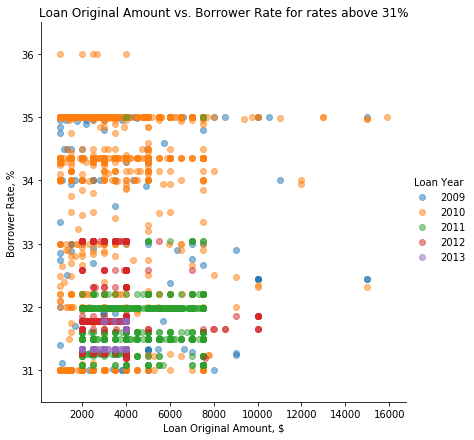

In [80]:
g = sb.FacetGrid(data = loan_df_32, hue = 'LoanOriginationYear', height = 6);
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', alpha = 0.5);
g.add_legend(title = 'Loan Year');
tick_props = np.arange(0.31, 0.37, 0.01)
tick_names = ['{:0.0f}'.format(v*100) for v in tick_props]
plt.yticks(tick_props, tick_names)
plt.ylim(0.305, 0.365)

plt.title('Loan Original Amount vs. Borrower Rate for rates above 31%')
plt.xlabel('Loan Original Amount, $')
plt.ylabel('Borrower Rate, %');


From the above plot we can clearly see that the high rates (above 31%) follow a certain pattern. There are clusters of particular rates, as for example at 35%, around 34.4%, 33%, above 32%, 32%, around 31.5% and 31%.

And we also clearly see that the majority of these high rates are attributable to 2010 and 2011 years, which we already discovered in the univariate visualisations section. These years experiences a financial downturn, which drove borrower interest rates up.

Besides we clearly see that the high-rate loans all were below 16K. No loans for an amount larger than 16K have been provided at the rates as high as we see on this distribution. The overwelming majority of the high-rate loans were capped by the amount of 8K.

In [399]:
loan_df_32.describe()

,Term,BorrowerRate,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment
count,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000
mean,37.452149,0.322219,4.089639,4.280912,97.879383,673.482731,692.482731,0.357901,26.985500,3809.658186,162.809618
std,5.722513,0.011093,1.501265,4.685781,92.995502,35.859879,35.859879,0.700236,11.336877,1534.710171,67.873792
min,36.000000,0.310000,1.000000,0.000000,0.000000,600.000000,619.000000,0.000000,3.000000,1000.000000,0.000000
25%,36.000000,0.317700,3.000000,1.000000,29.000000,660.000000,679.000000,0.170000,19.000000,3000.000000,129.570000
50%,36.000000,0.317700,4.000000,2.000000,68.000000,680.000000,699.000000,0.250000,25.000000,4000.000000,172.760000
75%,36.000000,0.319900,5.000000,7.000000,140.000000,700.000000,719.000000,0.380000,34.000000,4000.000000,173.710000
max,60.000000,0.360000,10.000000,20.000000,616.000000,820.000000,839.000000,10.010000,56.000000,15900.000000,698.680000


#### 2) How do the Debt-to-Income Ratio and the Borrower Rate affect the Loan Original Amount?

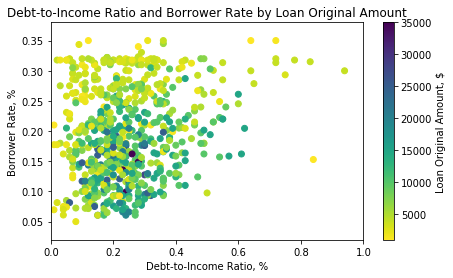

In [81]:
np.random.seed(2018)
sample = np.random.choice(loan_df_clean.shape[0], 1000, replace = False)
loan_df_subset = loan_df_clean.reindex(sample)

# plotting the data
plt.figure(figsize = [7,4])
plt.scatter(data = loan_df_subset, x = 'DebtToIncomeRatio', y = 'BorrowerRate', c = 'LoanOriginalAmount',
            cmap = 'viridis_r')
plt.xlim(0, 1.0)
plt.title('Debt-to-Income Ratio and Borrower Rate by Loan Original Amount')
plt.xlabel('Debt-to-Income Ratio, %')
plt.ylabel('Borrower Rate, %')
plt.colorbar(label = 'Loan Original Amount, $');

From the above plot we can make the following inferences:

- the overwelming majority of loans were provided to borrowers with the Debt-to-Income Ratio of below 0.6. Overcredited borrowers with DIR above 0.4 are very rare in the dataset;

- the higher the Borrower Rate is, the lower the Loan Amount is.
The larger loan amounts were provided at lower interst rates and to borrowers with the Debt-to-Income Ratio under 0.4.

#### Which factors contributed to the loan status of being defaulted: Original Loan Amount, Borrower Rate, Income Range or Prosper Rating?

In [401]:
# create a subset of defaulted loans
defaulted_loans = (loan_df_clean.LoanStatus == 'Defaulted')
loan_df_defaulted = loan_df_clean.loc[defaulted_loans]
loan_df_defaulted.sample(5)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LoanOriginationYear
25860,36,Defaulted,0.1385,B,8,1,Full-time,131.0,True,740.0,759.0,0.27,"$25,000-49,999",48,5000,170.52,2010
57654,36,Defaulted,0.2399,D,5,6,Full-time,285.0,False,620.0,639.0,0.06,"$50,000-74,999",33,5000,196.14,2011
48993,36,Defaulted,0.2049,C,7,14,Employed,107.0,False,700.0,719.0,0.35,"$25,000-49,999",24,3000,112.24,2012
103258,36,Defaulted,0.3058,E,4,1,Employed,43.0,False,680.0,699.0,0.38,"$75,000-99,999",26,4000,171.08,2012
8341,36,Defaulted,0.3199,HR,2,1,Employed,38.0,True,640.0,659.0,0.50,"$25,000-49,999",32,4000,174.20,2011


Below I will plot a grid of scatter plots between two numeric variables of Loan Amount and the Borrower Rate depending on the categorical variable of Income Range of the borrower.

The top row shows the plots for the subset of defaulted loan only.

The bottom row shows the plots for the entire dataset (based on a sample of 1,000 loans).


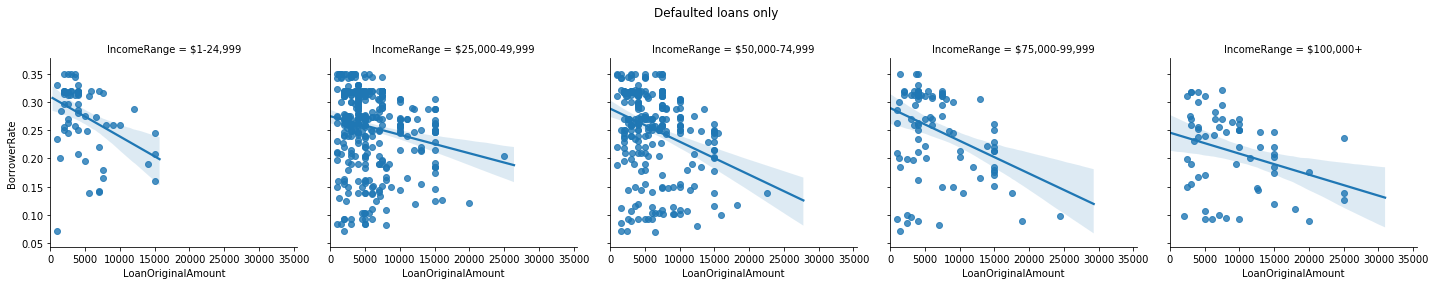

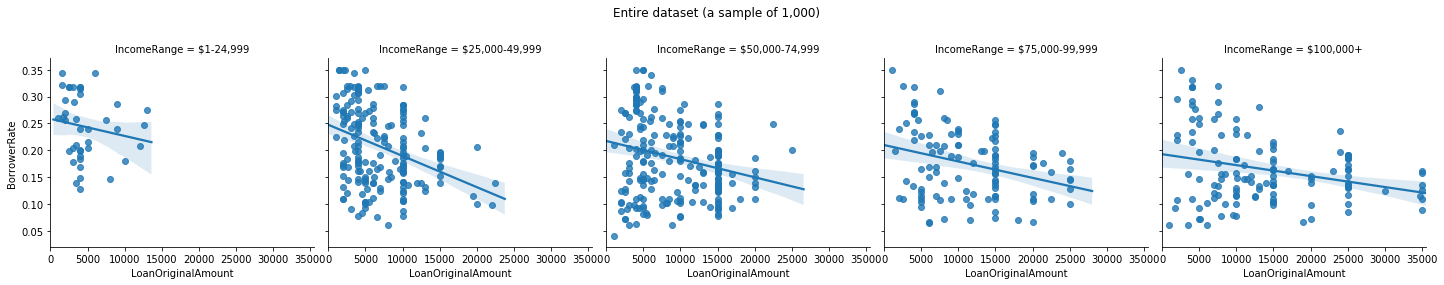

In [618]:
np.random.seed(2000)
sample_1000 = np.random.choice(loan_df_clean.shape[0], 1000, replace = False)
loan_df_subset1000 = loan_df_clean.loc[sample_1000, :]


g = sb.FacetGrid(data = loan_df_defaulted, col = 'IncomeRange', height = 4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate');
plt.subplots_adjust(top = 0.8)
g.fig.suptitle('Defaulted loans only')

plt.xlim(0, 35500);


g = sb.FacetGrid(data = loan_df_subset1000, col = 'IncomeRange', size = 4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate');
plt.subplots_adjust(top = 0.8)
g.fig.suptitle('Entire dataset (a sample of 1,000)')
plt.xlim(0, 35500)
plt.show()

From the above plots for the defaulted loans (the top row) we can make the following observations:

- for low-income borrowers (up to 25K), the interest rate was clearly higher than for all other earning categories
- the middle-range earners (25K - 75K) received the majority of loans
- the loan amounts were not very high: for all categories we see that the majority of loans were below approximately 7K with a clear cut-off boundary of 15K.

#### Do the distributions for the defaulted loans differ significantly for the entire dataset (based on the sample of 1,000 loans)?  

The distributions for the defaulted loans do not, however, differ much from the entire dataset of loans (the bottom row).
Based on the visual comparison between the plots for the subset of defaulted loans only and the plots for a sample of the entire dataset, I do not see any crucial differences in the patterns of the distributions. The only noticeable difference I see is that the average Loan Amount of the defaulted loans is lower than the average Loan Amounts in the sample of the entire dataset. This promts that the lenders know beforehand if a particular borrower runs a higher risk of default and do not lend a lot of money to him/her. Way to go!

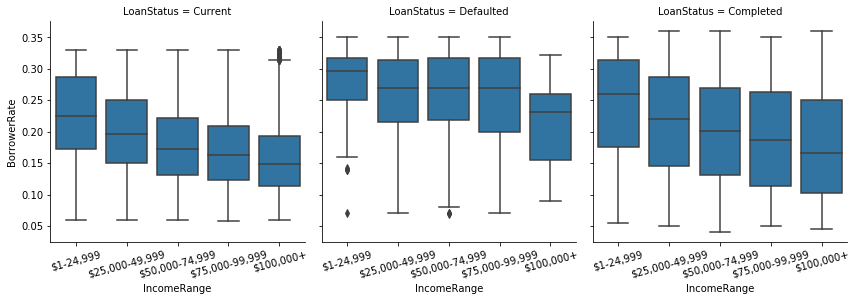

In [83]:
loan_df_status_2 = loan_df_clean[(loan_df_clean['LoanStatus']=='Defaulted') | (loan_df_clean['LoanStatus']=='Current') | (loan_df_clean['LoanStatus']=='Completed')].copy()
loan_df_status_2['LoanStatus'] = loan_df_status_2['LoanStatus'].astype(str)
g = sb.FacetGrid(loan_df_status_2, col = 'LoanStatus', height = 4)
g.map(sb.boxplot, 'IncomeRange', 'BorrowerRate', order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                '$75,000-99,999', '$100,000+']);
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

From the above plots I can see that for the loans with the Loan Status of `Current` and `Completed` the Borrower Rate decreased as the Income Range increased.
For the `Defaulted` loans, however, the Borrower Rate remained on the same high level, except for the most upper Income Range. From the preceding analysis we saw that the high rate was characteristic of the borrowers with lower Prosper Ratings. From these plots we see that the defaulted loans tend to have higher Borrower Rates, which confirms that the borrowers with low Prosper Ratings received their ratings not in vain but did deserve it.

#### I will now look into the effect of the Prosper Rating on the Borrower Rate and Loan Amount.

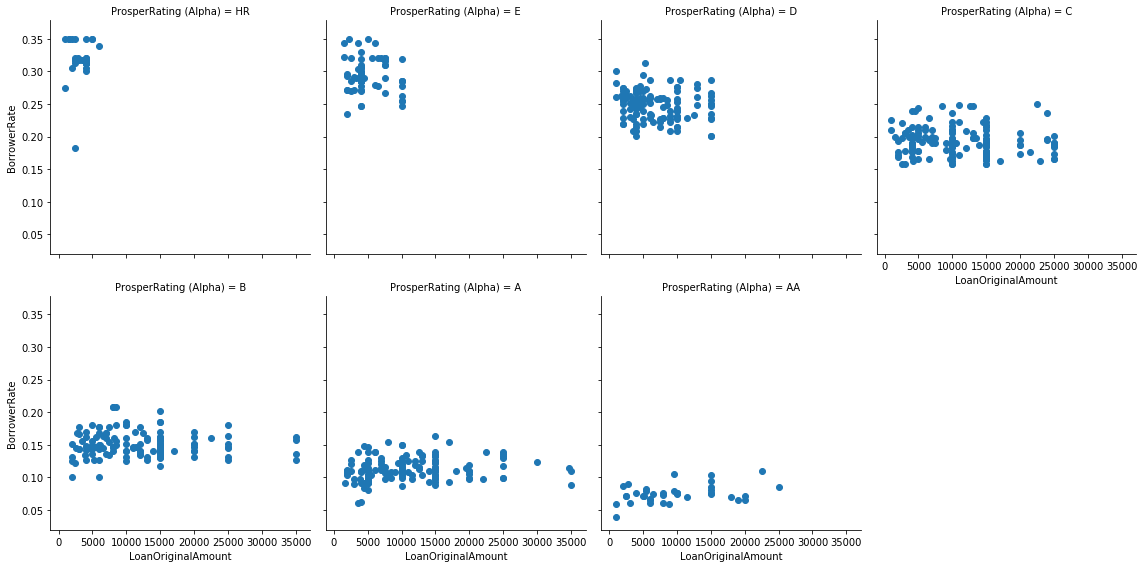

In [579]:
g = sb.FacetGrid(data = loan_df_subset1000, col = 'ProsperRating (Alpha)', size = 4,
                margin_titles = True, col_wrap = 4)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate');


This choice of variables gives us a much clearer view on what has influenced the Borrower Rate and the Loan Amount. Obviously, the borrower's Prosper Rating influenced greatly the Borrower Rate.

We see from the plots above that the borrowers with the lowest Prosper Rating (HR) received loans at the highest Borrower Rate, while the Loan Amount was the smallest. The Borrower Rate gradually decreases as the Prosper Rating increases, reaching its minimum values for the borrowers with the highest Prosper Score (AA).
As for the Loan Amount, we see that the Loan Amount increases as the Prosper Rating increases and certain limits in the Loan Amount may be observed for particular Prosper Ratings, for example, 10K for E-borrowers, 15K for D-, C- and B-borrowers and the largest threshold for A- and AA-borrowers.

#### I will now plot these variables in a different way to make this dependency visible on a single plot.

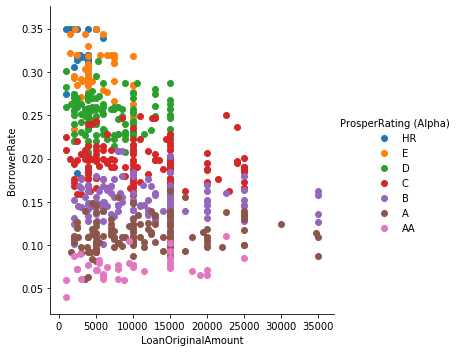

In [85]:
g = sb.FacetGrid(data = loan_df_subset1000, hue = 'ProsperRating (Alpha)', height = 5);
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate');
g.add_legend();

This distribution clearly shows the way how a borrower's Prosper Rating affects the Borrower Rate and the Loan Amount. The higher the Prosper Rating of a borrower is, the lower the Borrower Rate is. And the largest Loan Amounts are offered to borrowers with A and B Prosper Ratings. And borrowers with the best Prosper Rating (AA) tend not to borrow large amounts. Way to go to keep their high ratings!

### The relationships I observed in this part of the investigation. Which features strengthened each other in terms of looking at our features of interest?

I infered some interesting relationships from the above multivariate analysis.

- We saw that the high-rate loans were all below 16K. No loans for an amount larger than 16K have been provided at these high rates. The overwelming majority of the high-rate loans were capped by the amount of 8K.

- The overwelming majority of loans were provided to borrowers with the Debt-to-Income Ratio of below 0.6. Overcredited borrowers with DIR above 0.4 are very rare in the dataset.

- Larger Loan Amounts were provided at lower Borrower Rates and to borrowers with the Debt-to-Income Ratio under 0.4.

In the subset of the loans with the Loan Status of `Defaulted`

- for low-income borrowers (with Income Range up to 25K), the interest rate was clearly higher than for all other earning categories
- the Loan Amounts were not very high: the majority of loans were below approximately 7K with a clear cut-off threshold of 15K.

We saw that for the loans with the Loan Status of `Current` and `Completed` the Borrower Rate decreased as the Income Range increased.
For the `Defaulted` loans, however, the Borrower Rate remained on the same high level, except for the most upper Income Range.

We saw that the loans for the borrowers with the lowest Prosper Rating (HR) received loans at the highest Borrower Rate, while the Loan Amount was the smallest. The Borrower Rate gradually decreases as the Prosper Rating increases, reaching its minimum values for the borrowers with the highest Prosper Score (AA).

As for the Loan Amount, we saw that the Loan Amount increases as the Prosper Rating increases.

### Interesting and surprising interactions between features revealed

Surprisingly, in the category of defaulted loans there are quite a few instances of defaults even in the categories of borrowers with the best Prosper Ratings of A and AA. Same is true about defaulting borrowers in the most upper Income Range of above 100K.

We also saw that the majority of the high rates above 30% are attributable to 2010 and 2011 years. These years experienced a financial downturn, which drove borrower interest rates up.

We saw that the high Borrower Rate was characteristic of the borrowers with lower Prosper Ratings. Besides we saw that the loans with the status `Defaulted` tend to have higher Borrower Rates, which confirms that the borrowers with low Prosper Ratings received their ratings not in vain but did deserve it.

Certain limits in the Loan Amount may be observed for particular Prosper Ratings, for example, 10K for borrowers with the Prosper Rating of `E`, 15K for `D`, `C` and `B` borrowers and the largest threshold for `A` and `AA` borrowers.

